In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('/Users/arijitchandra/Downloads/Agriculture_ML/Train.csv')
test = pd.read_csv('/Users/arijitchandra/Downloads/Agriculture_ML/Test.csv')
sub = pd.read_csv('/Users/arijitchandra/Downloads/Agriculture_ML/Sample_submission.csv')

In [2]:
train.shape, test.shape, sub.shape

((88858, 10), (59310, 9), (59310, 2))

In [3]:
train.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2


In [4]:
print("Total Features with NaN Values in train = " + str(train.columns[train.isnull().sum() != 0].size)) 
print("Total Features with NaN Values in test = " + str(test.columns[test.isnull().sum() != 0].size))

Total Features with NaN Values in train = 1
Total Features with NaN Values in test = 1


In [5]:
## Percentage of data missing in train dataset
train.isna().mean() * 100

ID                          0.00000
Estimated_Insects_Count     0.00000
Crop_Type                   0.00000
Soil_Type                   0.00000
Pesticide_Use_Category      0.00000
Number_Doses_Week           0.00000
Number_Weeks_Used          10.12852
Number_Weeks_Quit           0.00000
Season                      0.00000
Crop_Damage                 0.00000
dtype: float64

In [6]:
## Percentage of data missing in test dataset
test.isna().mean() * 100

ID                         0.00000
Estimated_Insects_Count    0.00000
Crop_Type                  0.00000
Soil_Type                  0.00000
Pesticide_Use_Category     0.00000
Number_Doses_Week          0.00000
Number_Weeks_Used          9.93593
Number_Weeks_Quit          0.00000
Season                     0.00000
dtype: float64

In [7]:
train.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'
Shape of your Data Set: (88858, 10)
Classifying variables in data set...
    9 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Nothing to add Plot not being added
Nothing to add Plot not being added
Could not draw Pivot Charts against Dependent Variable
All plots done
Time to run AutoViz (in seconds) = 17.195


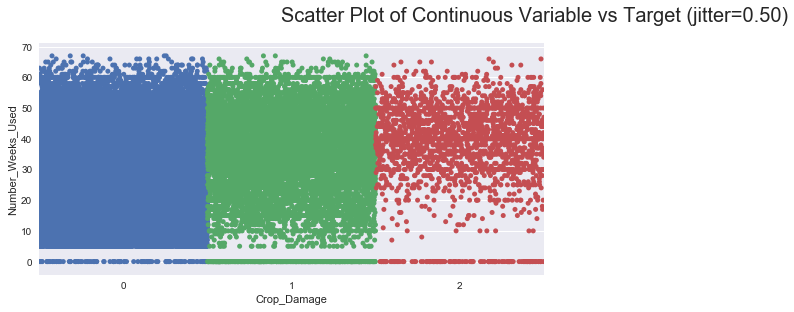

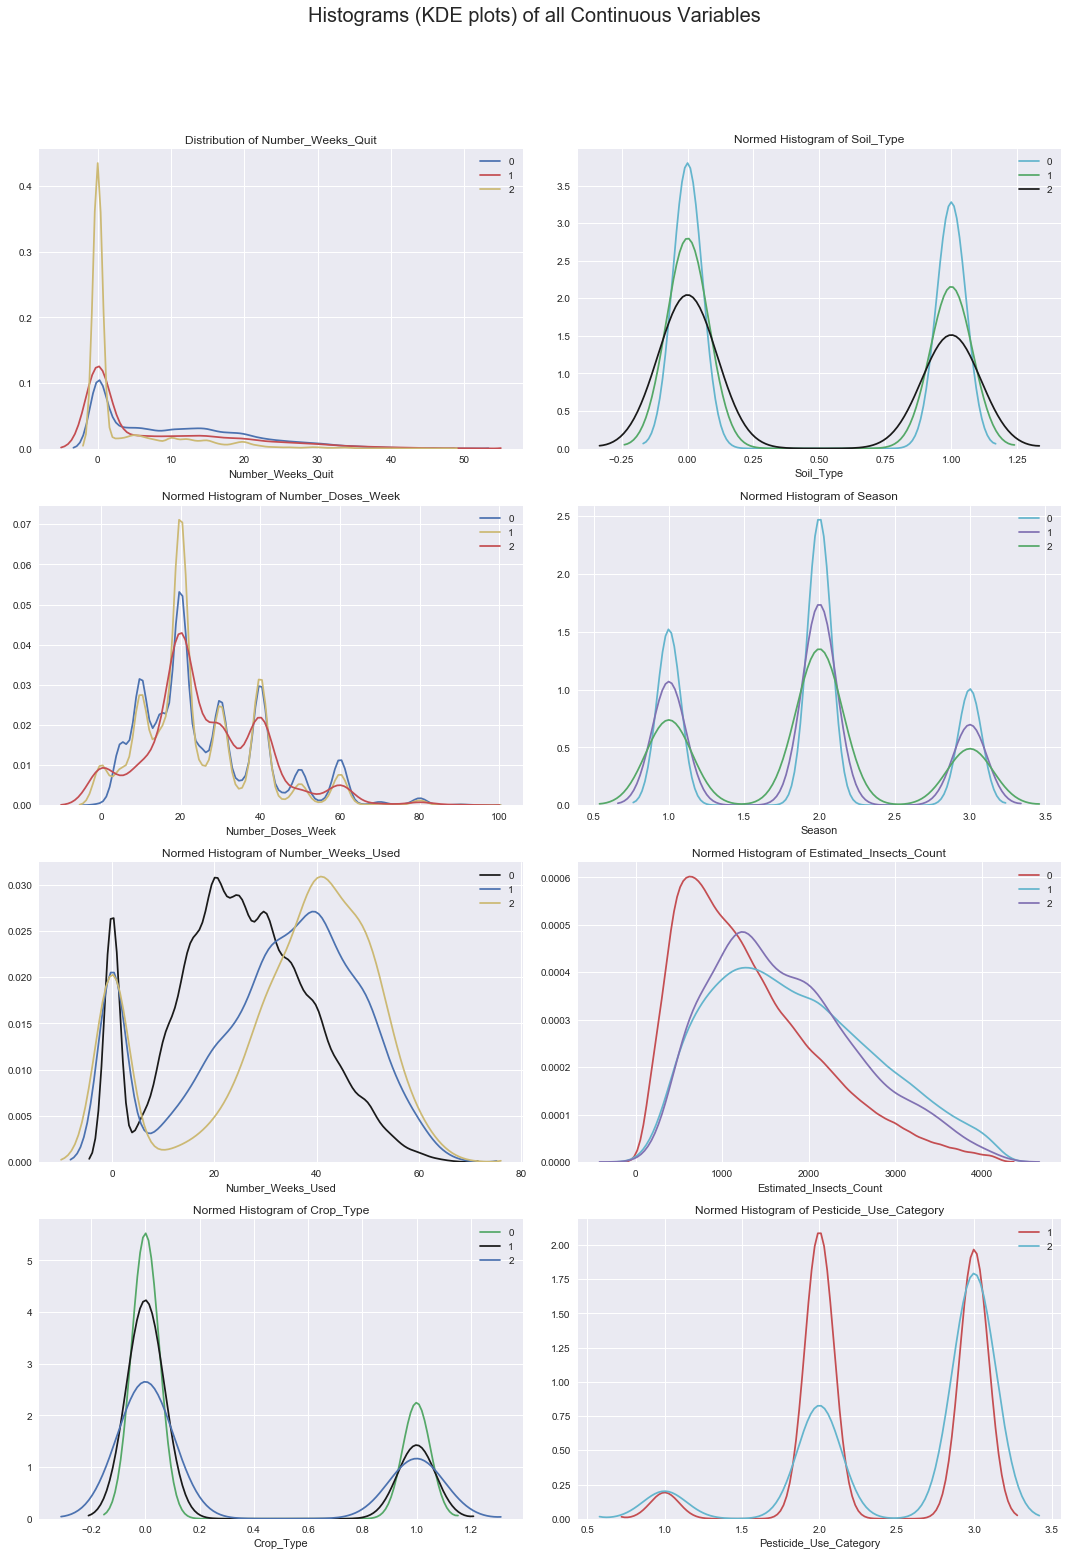

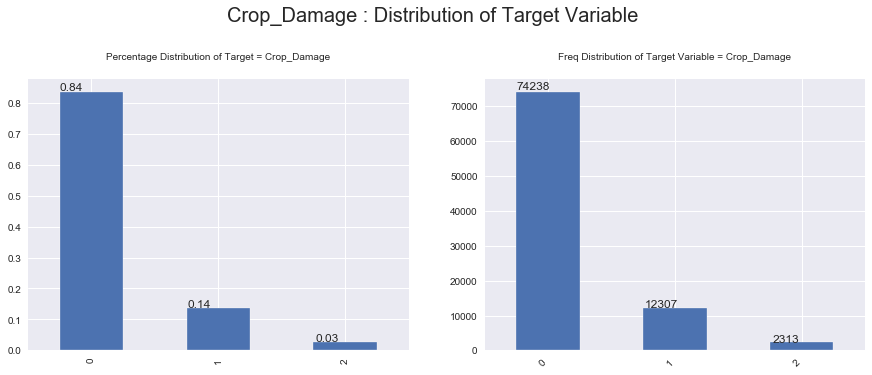

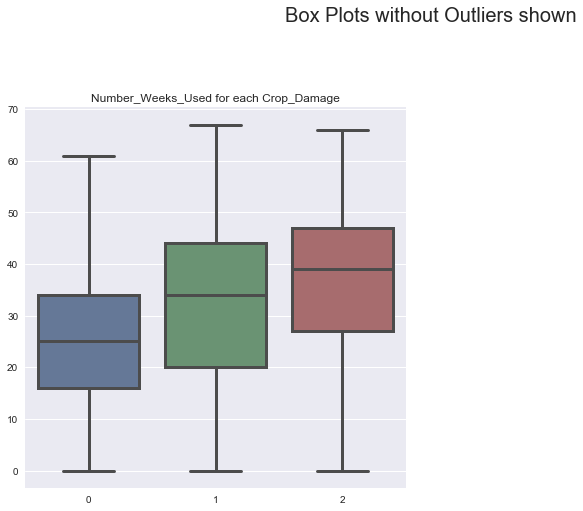

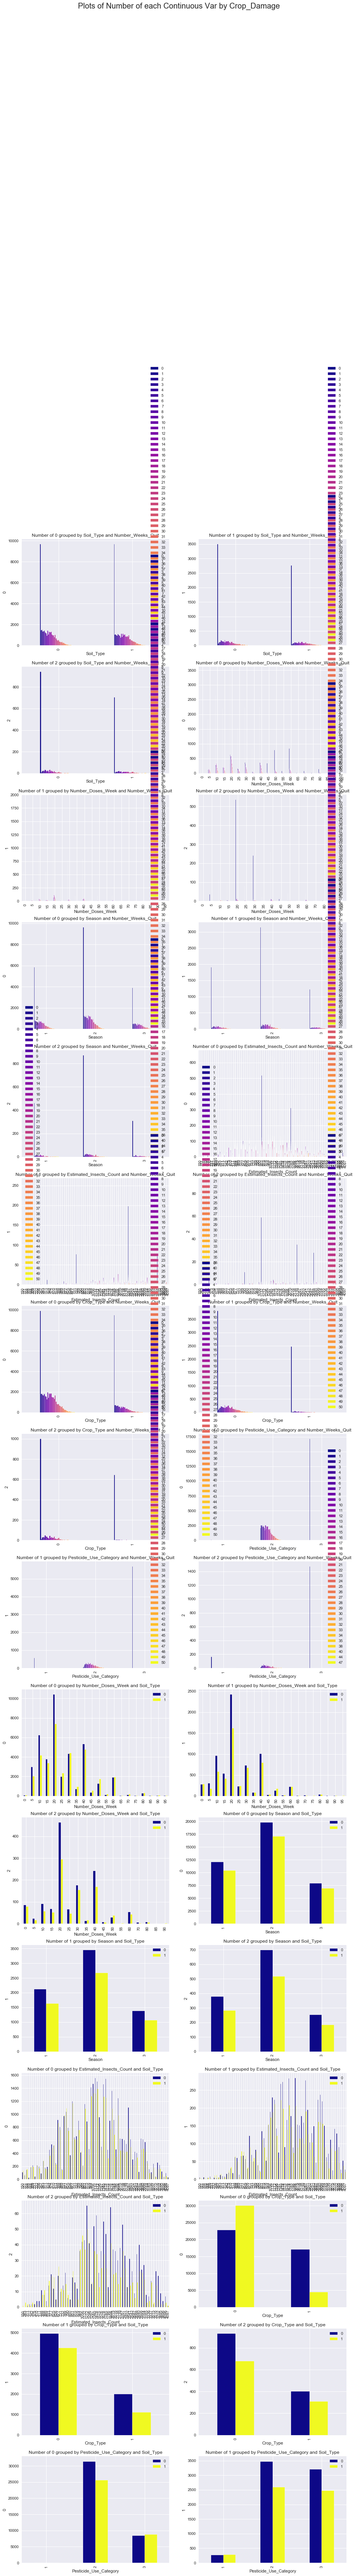

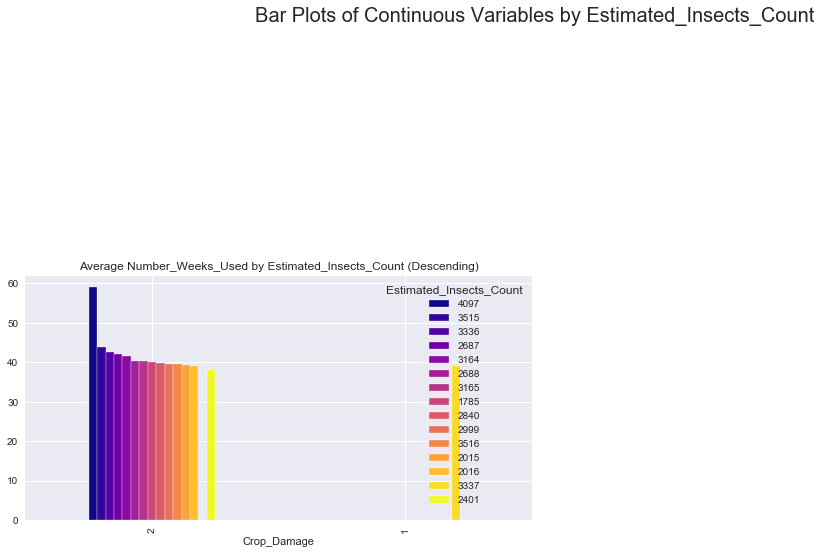

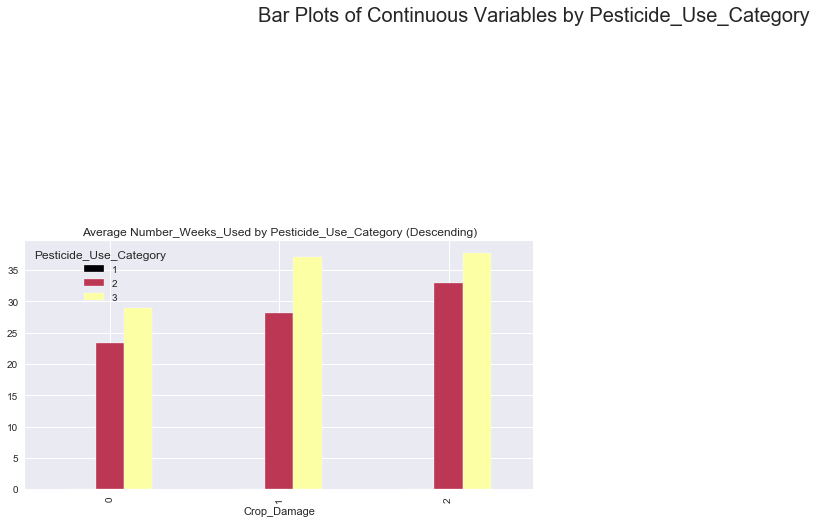

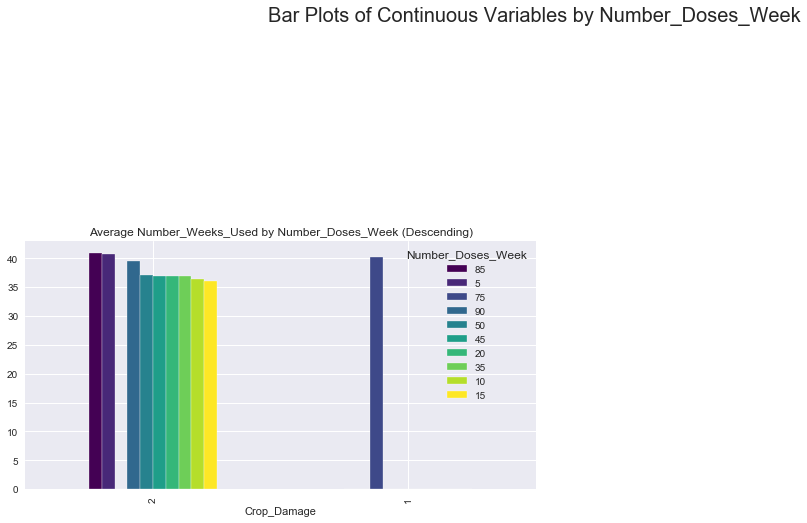

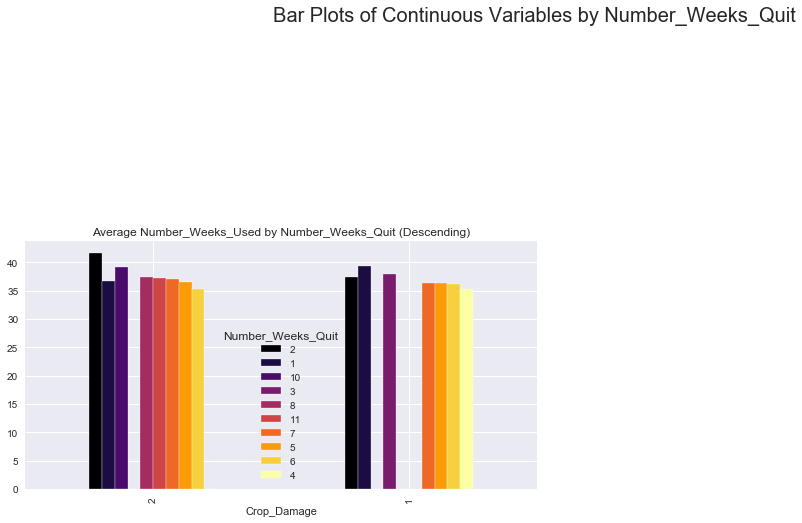

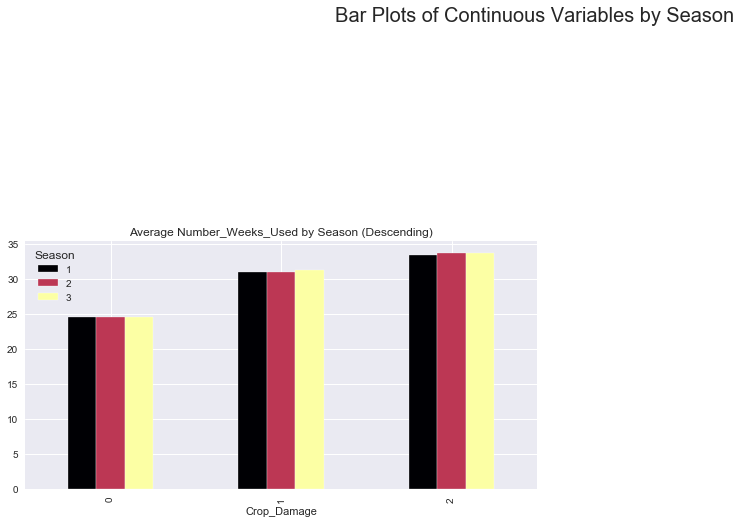

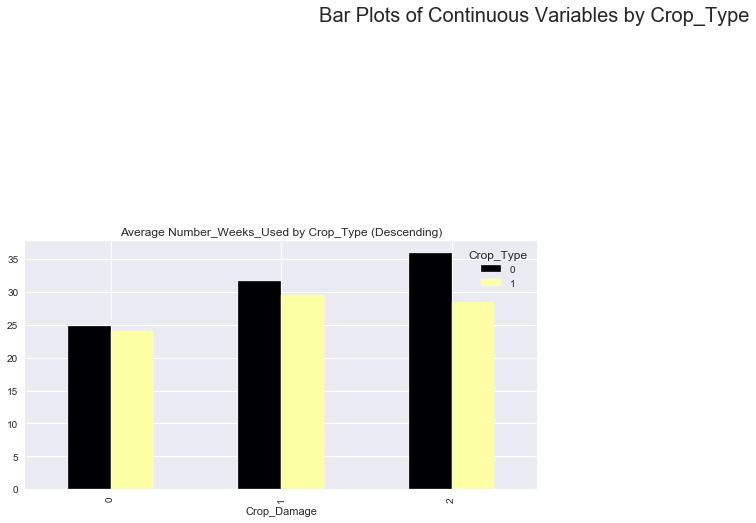

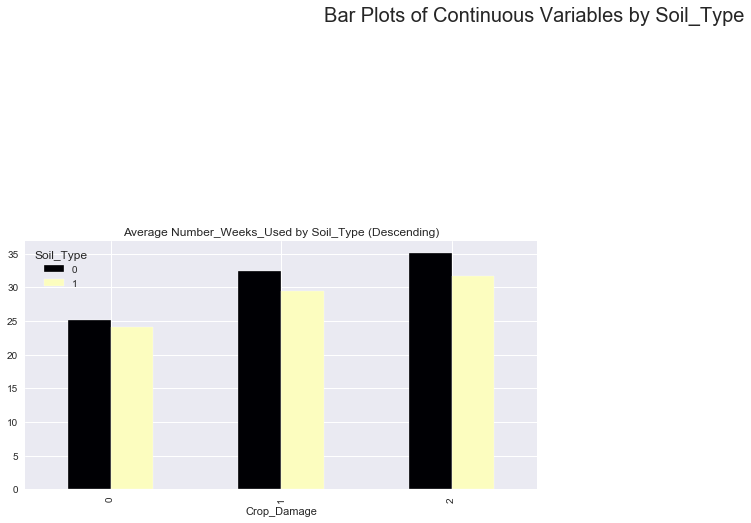

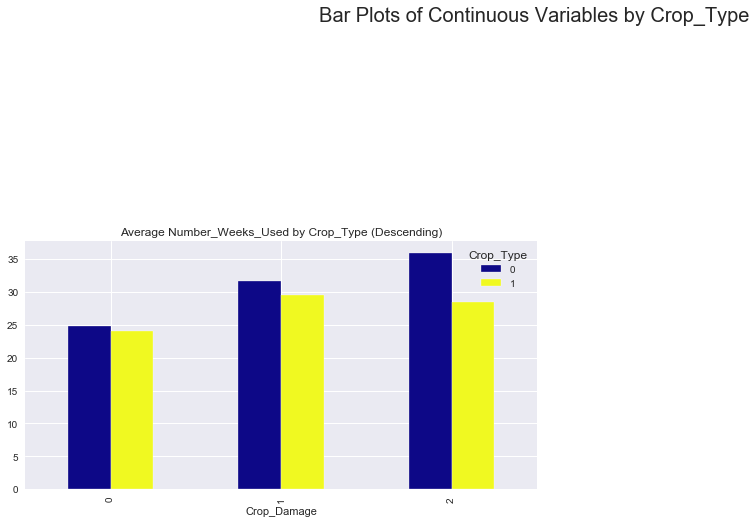

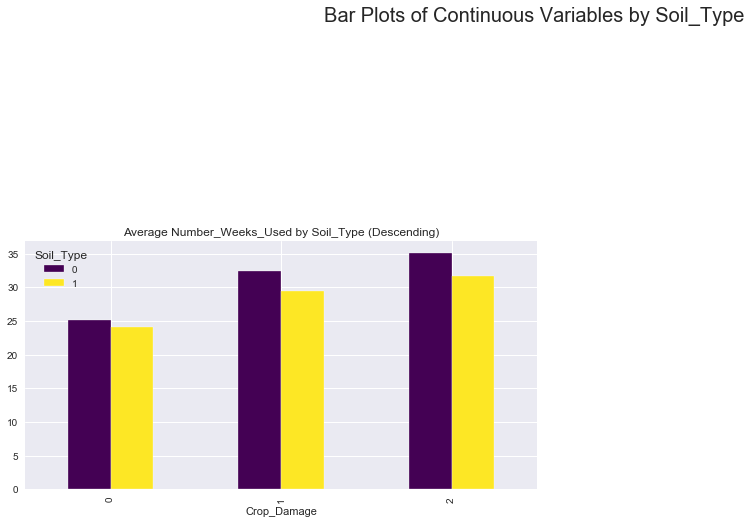

In [8]:
from autoviz.AutoViz_Class import AutoViz_Class
av= AutoViz_Class()
df = av.AutoViz('/Users/arijitchandra/Downloads/Agriculture_ML/Train.csv', depVar='Crop_Damage')

In [90]:
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
color = sns.color_palette()

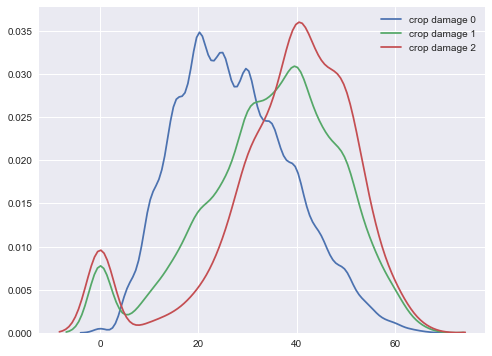

In [10]:
plt.figure(figsize=(8,6))
sns.kdeplot(train.Number_Weeks_Used[train.Crop_Damage==0], color=color[0])
sns.kdeplot(train.Number_Weeks_Used[train.Crop_Damage==1], color=color[1])
sns.kdeplot(train.Number_Weeks_Used[train.Crop_Damage==2], color=color[2])
plt.legend(['crop damage 0','crop damage 1','crop damage 2'])
plt.show()

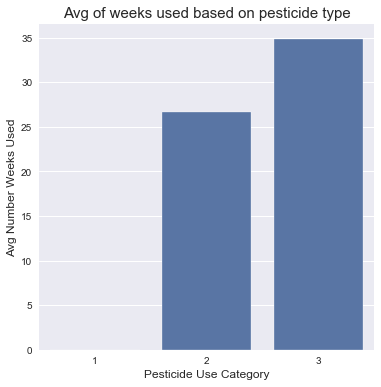

In [11]:
plt.figure(figsize=(6,6))
sns.barplot(y="Number_Weeks_Used",x=train.groupby(['Pesticide_Use_Category']).mean().index,
            data=train.groupby(['Pesticide_Use_Category']).mean(), color=color[0])
plt.ylabel('Avg Number Weeks Used', fontsize=12)
plt.xlabel('Pesticide Use Category', fontsize=12)
plt.title('Avg of weeks used based on pesticide type', fontsize=15)
plt.show()

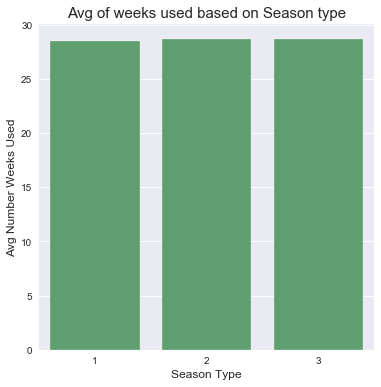

In [12]:
plt.figure(figsize=(6,6))
sns.barplot(y="Number_Weeks_Used",x=train.groupby(['Season']).mean().index,
            data=train.groupby(['Season']).mean(), color=color[1])
plt.ylabel('Avg Number Weeks Used', fontsize=12)
plt.xlabel('Season Type', fontsize=12)
plt.title('Avg of weeks used based on Season type', fontsize=15)
plt.show()

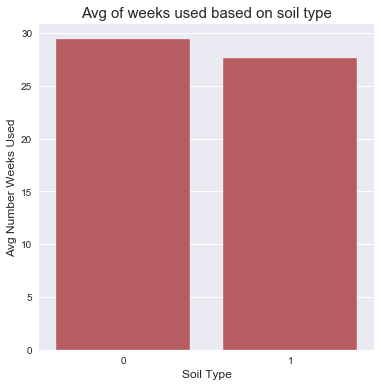

In [13]:
plt.figure(figsize=(6,6))
sns.barplot(y="Number_Weeks_Used",x=train.groupby(['Soil_Type']).mean().index,
            data=train.groupby(['Soil_Type']).mean(), color=color[2])
plt.ylabel('Avg Number Weeks Used', fontsize=12)
plt.xlabel('Soil Type', fontsize=12)
plt.title('Avg of weeks used based on soil type', fontsize=15)
plt.show()

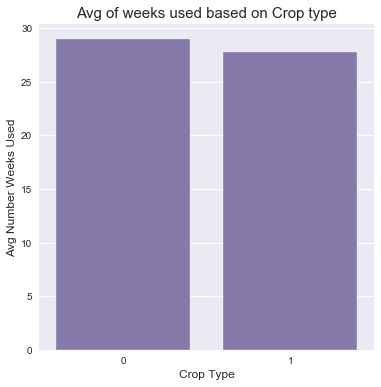

In [14]:
plt.figure(figsize=(6,6))
sns.barplot(y="Number_Weeks_Used",x=train.groupby(['Crop_Type']).mean().index,
            data=train.groupby(['Crop_Type']).mean(), color=color[3])
plt.ylabel('Avg Number Weeks Used', fontsize=12)
plt.xlabel('Crop Type', fontsize=12)
plt.title('Avg of weeks used based on Crop type', fontsize=15)
plt.show()

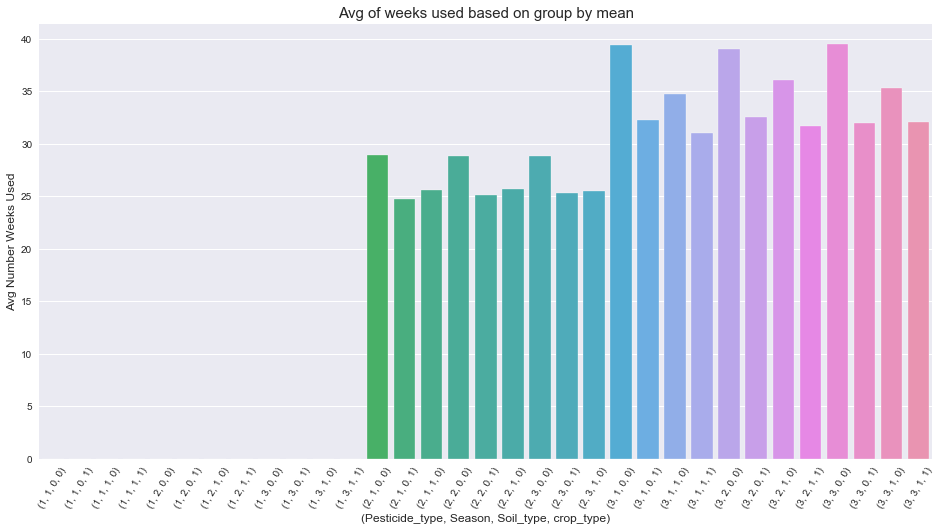

In [15]:
plt.figure(figsize=(16,8))
sns.barplot(y="Number_Weeks_Used",x=train.groupby(['Pesticide_Use_Category','Season','Soil_Type','Crop_Type']).mean().index,
            data=train.groupby(['Pesticide_Use_Category','Season','Soil_Type','Crop_Type']).mean(), hue_order='ascending')
plt.ylabel('Avg Number Weeks Used', fontsize=12)
plt.xlabel('(Pesticide_type, Season, Soil_type, crop_type)', fontsize=12)
plt.xticks(rotation=60)
plt.title('Avg of weeks used based on group by mean', fontsize=15)
plt.show()

In [16]:
## From above visualization it seems missing values in Number_Weeks_Used feature can be replaced by group mean
## of data based on Pesticide_Use_Category, Season , Soil_Type and Crop_Type

train.groupby(['Pesticide_Use_Category','Season','Soil_Type','Crop_Type'])['Number_Weeks_Used'].mean()


Pesticide_Use_Category  Season  Soil_Type  Crop_Type
1                       1       0          0             0.000000
                                           1             0.000000
                                1          0             0.000000
                                           1             0.000000
                        2       0          0             0.000000
                                           1             0.000000
                                1          0             0.000000
                                           1             0.000000
                        3       0          0             0.000000
                                           1             0.000000
                                1          0             0.000000
                                           1             0.000000
2                       1       0          0            28.929535
                                           1            24.778298
                       

In [17]:
train.Number_Weeks_Used.fillna(train.groupby(['Pesticide_Use_Category','Season','Soil_Type','Crop_Type'])
                               ['Number_Weeks_Used'].transform('mean'), inplace=True)

test.Number_Weeks_Used.fillna(test.groupby(['Pesticide_Use_Category','Season','Soil_Type','Crop_Type'])
                              ['Number_Weeks_Used'].transform('mean'), inplace=True)

print("Total Features with NaN Values in train = " + str(train.columns[train.isnull().sum() != 0].size)) 
print("Total Features with NaN Values in test = " + str(test.columns[test.isnull().sum() != 0].size))

Total Features with NaN Values in train = 0
Total Features with NaN Values in test = 0


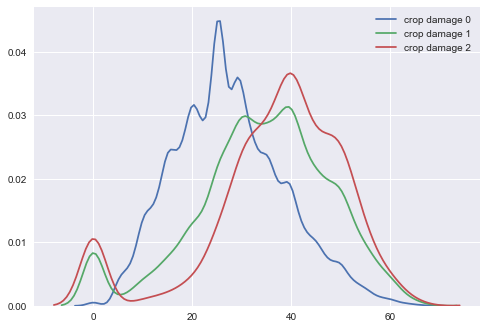

In [18]:
## Distribution after treating missing values

sns.kdeplot(train.Number_Weeks_Used[train.Crop_Damage==0], color=color[0])
sns.kdeplot(train.Number_Weeks_Used[train.Crop_Damage==1], color=color[1])
sns.kdeplot(train.Number_Weeks_Used[train.Crop_Damage==2], color=color[2])
plt.legend(['crop damage 0','crop damage 1','crop damage 2'])
plt.show()

In [19]:
## Corelation matrix train dataset
train.corr().style.background_gradient(cmap='terrain')

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.407609,0.299279,0.002304,0.202888
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.047113,-0.233394,0.002161,-0.016495
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.072191,0.009364,0.002327,-0.021997
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.360267,-0.554169,0.002811,0.175002
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.123448,-0.037131,-0.001401,-0.030874
Number_Weeks_Used,0.407609,-0.047113,-0.072191,0.360267,0.123448,1.000000,-0.436946,0.004856,0.221028
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.436946,1.000000,0.000595,-0.133117
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.004856,0.000595,1.000000,-0.000184
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.221028,-0.133117,-0.000184,1.000000


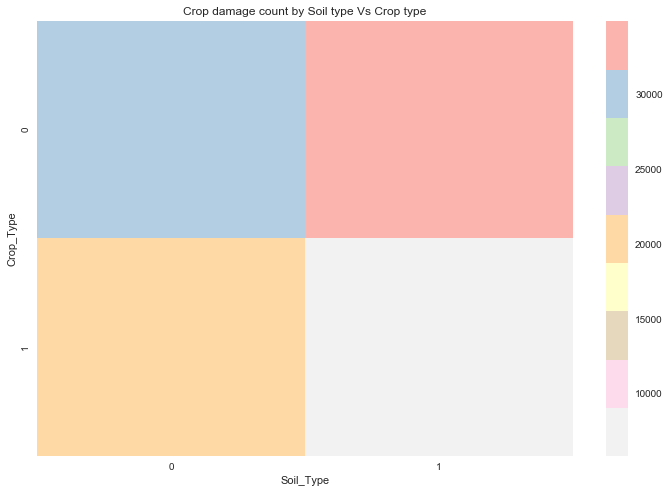

In [20]:
grouped_df = train.groupby(['Crop_Type','Soil_Type'])["Crop_Damage"].count().reset_index()
grouped_df = grouped_df.pivot('Crop_Type','Soil_Type','Crop_Damage')

plt.figure(figsize=(12,8))
sns.heatmap(grouped_df, cmap='Pastel1_r')
plt.title("Crop damage count by Soil type Vs Crop type")
plt.show()

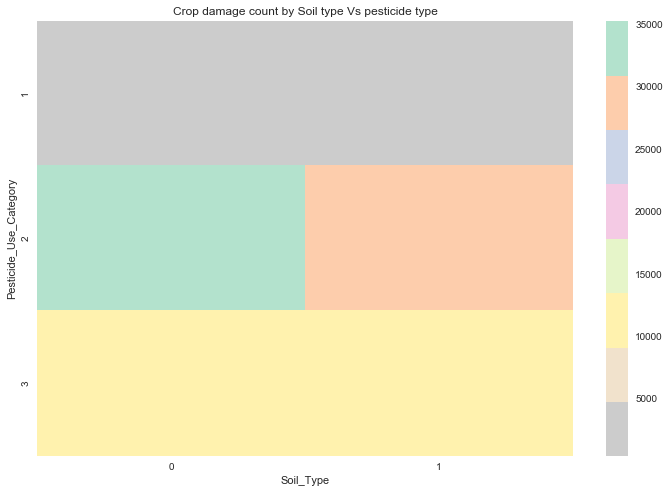

In [21]:
grouped_df = train.groupby(['Pesticide_Use_Category','Soil_Type'])["Crop_Damage"].count().reset_index()
grouped_df = grouped_df.pivot('Pesticide_Use_Category','Soil_Type','Crop_Damage')

plt.figure(figsize=(12,8))
sns.heatmap(grouped_df, cmap='Pastel2_r')
plt.title("Crop damage count by Soil type Vs pesticide type")
plt.show()

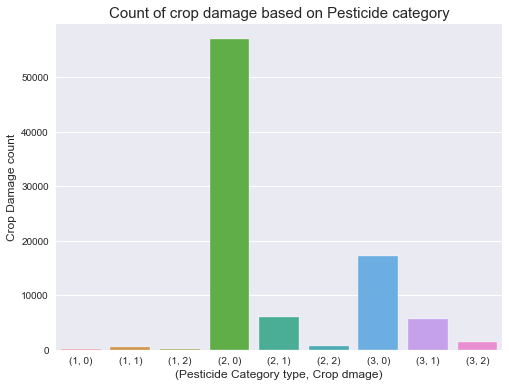

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(y="ID",x=train.groupby(['Pesticide_Use_Category','Crop_Damage']).count().index,
            data=train.groupby(['Pesticide_Use_Category','Crop_Damage']).count(), hue_order='ascending')
plt.ylabel('Crop Damage count', fontsize=12)
plt.xlabel('(Pesticide Category type, Crop dmage)',fontsize=12)
plt.title('Count of crop damage based on Pesticide category', fontsize=15)
plt.show()

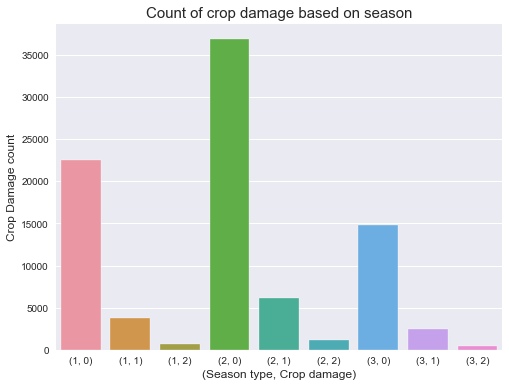

In [74]:
plt.figure(figsize=(8,6))
sns.barplot(y="ID",x=train.groupby(['Season','Crop_Damage']).count().index,
            data=train.groupby(['Season','Crop_Damage']).count(),
            hue_order='ascending')
plt.ylabel('Crop Damage count', fontsize=12)
plt.xlabel('(Season type, Crop damage)', fontsize=12)
plt.title('Count of crop damage based on season', fontsize=15)
plt.show()

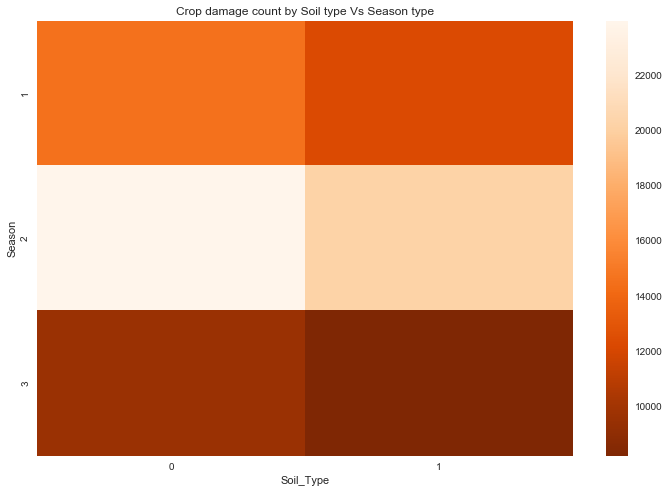

In [24]:
grouped_df = train.groupby(['Season','Soil_Type'])["Crop_Damage"].count().reset_index()
grouped_df = grouped_df.pivot('Season','Soil_Type','Crop_Damage')

plt.figure(figsize=(12,8))
sns.heatmap(grouped_df, cmap='Oranges_r')
plt.title("Crop damage count by Soil type Vs Season type")
plt.show()

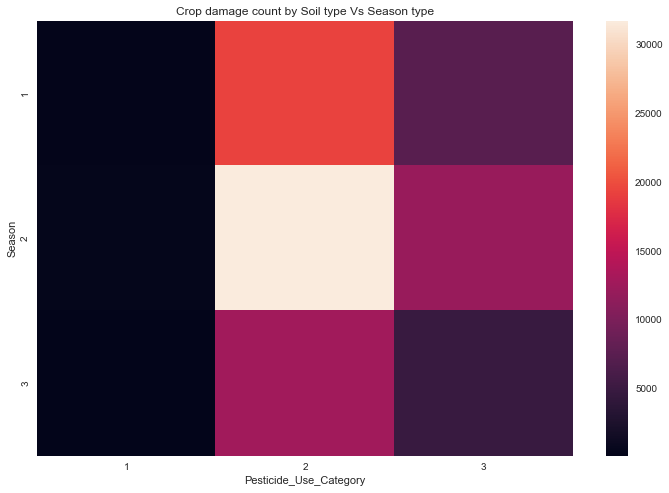

In [25]:
grouped_df = train.groupby(['Season','Pesticide_Use_Category'])["Crop_Damage"].count().reset_index()
grouped_df = grouped_df.pivot('Season','Pesticide_Use_Category','Crop_Damage')

plt.figure(figsize=(12,8))
sns.heatmap(grouped_df)
plt.title("Crop damage count by Soil type Vs Season type")
plt.show()

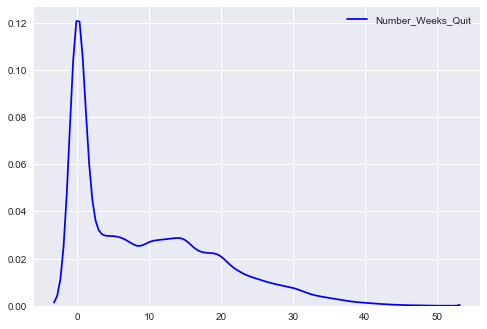

In [26]:
## Density plot of Number_Weeks_Quit feature
sns.kdeplot(train.Number_Weeks_Quit, color='blue')
#sns.kdeplot(np.sqrt(train.Number_Weeks_Quit), color='green')
plt.show()

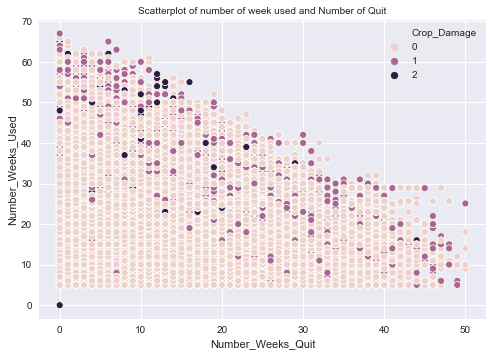

In [39]:
sns.scatterplot(x=train.Number_Weeks_Quit, y=train.Number_Weeks_Used, hue=train.Crop_Damage,hue_order='ascending')
plt.title('Scatterplot of number of week used and Number of Quit', fontsize=10)
plt.show()

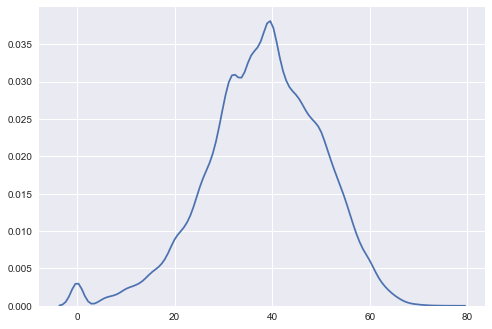

In [28]:
## Trying some feature engineering using Number_Weeks_Quit feature
train['Total_weeks'] = train.Number_Weeks_Used+train.Number_Weeks_Quit
test['Total_weeks'] = test.Number_Weeks_Used+test.Number_Weeks_Quit

sns.kdeplot(train.Number_Weeks_Used+train.Number_Weeks_Quit)

In [29]:
train['Pest_use_nouse_ratio']= train.Number_Weeks_Quit/train.Number_Weeks_Used
test['Pest_use_nouse_ratio']= test.Number_Weeks_Quit/test.Number_Weeks_Used

train['Pest_use_nouse_ratio'].fillna(0, inplace=True)
test['Pest_use_nouse_ratio'].fillna(0, inplace=True)

In [30]:
train['Pest_use_dur_per'] = train.Number_Weeks_Used/train.Total_weeks
test['Pest_use_dur_per'] = test.Number_Weeks_Used/test.Total_weeks

train['Pest_use_dur_per'].fillna(0, inplace=True)
test['Pest_use_dur_per'].fillna(0, inplace=True)

In [31]:
train['Pest_nouse_dur_per'] = train.Number_Weeks_Quit/train.Total_weeks
test['Pest_nouse_dur_per'] = test.Number_Weeks_Quit/test.Total_weeks

train['Pest_nouse_dur_per'].fillna(0, inplace=True)
test['Pest_nouse_dur_per'].fillna(0, inplace=True)

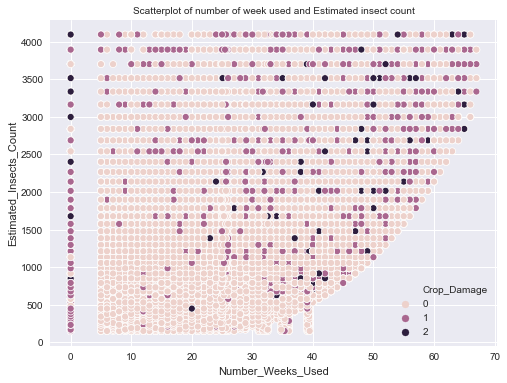

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=train.Number_Weeks_Used,y=train.Estimated_Insects_Count, hue=train.Crop_Damage,hue_order='ascending')
plt.title('Scatterplot of number of week used and Estimated insect count', fontsize=10)
plt.show()

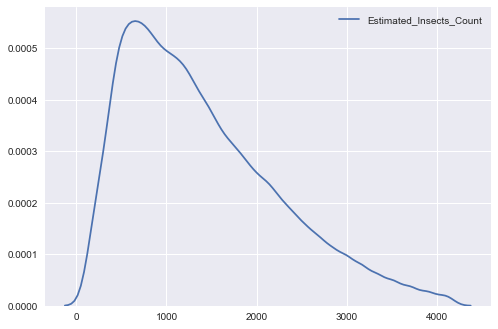

In [40]:
sns.kdeplot(train.Estimated_Insects_Count)
plt.show()

In [75]:
## Some more Feature engineering
train['Insect_treat_factor']=train.Estimated_Insects_Count/(train.Number_Doses_Week*train.Number_Weeks_Used)
test['Insect_treat_factor']=test.Estimated_Insects_Count/(test.Number_Doses_Week*test.Number_Weeks_Used)

In [76]:
train[train.Insect_treat_factor!=np.inf].Insect_treat_factor.max()

163.84

In [77]:
train.Insect_treat_factor[train.Insect_treat_factor==np.inf]=999
test.Insect_treat_factor[test.Insect_treat_factor==np.inf]=999
train.shape, test.shape

((88858, 15), (59310, 14))

In [78]:
train['EIC_grp_NORM']=train['Estimated_Insects_Count'] - \
train.groupby(['Crop_Type','Soil_Type',
               'Pesticide_Use_Category','Season'])['Estimated_Insects_Count'].transform('mean')

train['NDW_grp_NORM']=train['Number_Doses_Week'] - \
train.groupby(['Crop_Type','Soil_Type',
               'Pesticide_Use_Category','Season'])['Number_Doses_Week'].transform('mean')

train['NWU_grp_NORM']=train['Number_Weeks_Used'] - \
train.groupby(['Crop_Type','Soil_Type',
               'Pesticide_Use_Category','Season'])['Number_Weeks_Used'].transform('mean')

train['NWQ_grp_NORM']=train['Number_Weeks_Quit'] - \
train.groupby(['Crop_Type','Soil_Type',
               'Pesticide_Use_Category','Season'])['Number_Weeks_Quit'].transform('mean')

test['EIC_grp_NORM']=test['Estimated_Insects_Count'] - \
test.groupby(['Crop_Type','Soil_Type',
               'Pesticide_Use_Category','Season'])['Estimated_Insects_Count'].transform('mean')

test['NDW_grp_NORM']=test['Number_Doses_Week'] - \
test.groupby(['Crop_Type','Soil_Type',
               'Pesticide_Use_Category','Season'])['Number_Doses_Week'].transform('mean')

test['NWU_grp_NORM']=test['Number_Weeks_Used'] - \
test.groupby(['Crop_Type','Soil_Type',
               'Pesticide_Use_Category','Season'])['Number_Weeks_Used'].transform('mean')

test['NWQ_grp_NORM']=test['Number_Weeks_Quit'] - \
test.groupby(['Crop_Type','Soil_Type',
               'Pesticide_Use_Category','Season'])['Number_Weeks_Quit'].transform('mean')

train.shape, test.shape

((88858, 19), (59310, 18))

In [79]:
train.drop('ID', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)
train.shape, test.shape

((88858, 18), (59310, 17))

In [80]:
categorical_feature = ['Crop_Type','Soil_Type','Pesticide_Use_Category','Season']
train[categorical_feature]=train[categorical_feature].astype('category')
test[categorical_feature]=test[categorical_feature].astype('category')

#train['Crop_Damage']=train.Crop_Damage.astype('category')
train.dtypes

Estimated_Insects_Count       int64
Crop_Type                  category
Soil_Type                  category
Pesticide_Use_Category     category
Number_Doses_Week             int64
Number_Weeks_Used           float64
Number_Weeks_Quit             int64
Season                     category
Crop_Damage                   int64
Total_weeks                 float64
Pest_use_nouse_ratio        float64
Pest_use_dur_per            float64
Pest_nouse_dur_per          float64
Insect_treat_factor         float64
EIC_grp_NORM                float64
NDW_grp_NORM                float64
NWU_grp_NORM                float64
NWQ_grp_NORM                float64
dtype: object

In [81]:
train_dummies = pd.get_dummies(train, columns=categorical_feature)
test_dummies = pd.get_dummies(test, columns=categorical_feature)

train_dummies.shape, test_dummies.shape

((88858, 24), (59310, 23))

In [82]:
feature_names=[i for i in train_dummies.columns if i!= 'Crop_Damage']
X_trn = train_dummies[feature_names]
y_trn = train_dummies['Crop_Damage']
X_tst = test_dummies[feature_names]

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_trn, y_trn,stratify=y_trn, test_size=0.2,random_state=41)

X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_tst.shape

((71086, 23), (71086,), (17772, 23), (17772,), (59310, 23))

In [ ]:
#feature_names=[i for i in train.columns if i!= 'Crop_Damage']
#X_trn = train[feature_names]
#y_trn = train['Crop_Damage']
#X_tst = test[feature_names]
#
#from sklearn.model_selection import train_test_split
#X_train, X_valid, y_train, y_valid = train_test_split(X_trn, y_trn,stratify=y_trn, test_size=0.2,random_state=41)
#
#X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_tst.shape

In [83]:
from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(y_trn), class_weight.compute_class_weight('balanced',
                                                 np.unique(y_trn),
                                                 y_trn)))
class_weights

{0: 0.3989780615497903, 1: 2.4067062105576773, 2: 12.8055915838017}

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,random_state=8,max_features = "auto",class_weight={0:2.5,1:.415,2:.078},
                            min_samples_leaf=10,min_samples_split=6, oob_score = True,n_jobs = -1)
rf.fit(X_train, y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_valid, y_valid)))

Accuracy of Random Forest classifier on training set: 0.84
Accuracy of Random Forest classifier on test set: 0.84


In [85]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
imp_feature=feature_importances[feature_importances['importance']>=0.01].T.columns
print(len(imp_feature))
feature_importances

18


,importance
Insect_treat_factor,0.135462
EIC_grp_NORM,0.117006
Estimated_Insects_Count,0.100129
Number_Weeks_Used,0.094899
Total_weeks,0.086491
NWU_grp_NORM,0.074558
NDW_grp_NORM,0.066459
Number_Doses_Week,0.064931
Pest_use_dur_per,0.044132
Pest_use_nouse_ratio,0.028485


In [86]:
pred=rf.predict(X_tst)
sub['Crop_Damage'] = pred
sub.to_csv('submission.csv', index=False)

In [106]:
import lightgbm as lgb
model = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclass',num_class=3,class_weight={0:2.5,1:.415,2:.078},
                       early_stopping = 50,num_iteration=10000,num_leaves=60,
                       tree_learner='voting',min_data_in_leaf=10,max_depth=12,
                       learning_rate=0.01, n_estimators=1000, max_bin=255, subsample_for_bin=5000, 
                       min_split_gain=1, min_child_weight=0, min_child_samples=10, subsample=0.9, 
                       subsample_freq=1, colsample_bytree=.7, reg_alpha=0.2, 
                       reg_lambda=0.2, seed=41, nthread=-1, silent=True)

model.fit(
    X_train, 
    y_train, 
    eval_metric="multi_error", 
    eval_set=[(X_valid, y_valid),(X_train, y_train)],
    verbose=True,
    early_stopping_rounds = 50)

[1]	training's multi_error: 0.027703	training's multi_logloss: 0.13014	valid_0's multi_error: 0.164528	valid_0's multi_logloss: 0.702515
Training until validation scores don't improve for 50 rounds
[2]	training's multi_error: 0.027703	training's multi_logloss: 0.129552	valid_0's multi_error: 0.164528	valid_0's multi_logloss: 0.699025
[3]	training's multi_error: 0.027703	training's multi_logloss: 0.129035	valid_0's multi_error: 0.164528	valid_0's multi_logloss: 0.695916
[4]	training's multi_error: 0.027703	training's multi_logloss: 0.128533	valid_0's multi_error: 0.164528	valid_0's multi_logloss: 0.692946
[5]	training's multi_error: 0.027703	training's multi_logloss: 0.128064	valid_0's multi_error: 0.164528	valid_0's multi_logloss: 0.690132
[6]	training's multi_error: 0.027703	training's multi_logloss: 0.127613	valid_0's multi_error: 0.164528	valid_0's multi_logloss: 0.687448
[7]	training's multi_error: 0.027703	training's multi_logloss: 0.127183	valid_0's multi_error: 0.164528	valid_0'

LGBMClassifier(class_weight={0: 2.5, 1: 0.415, 2: 0.078}, colsample_bytree=0.7,
               early_stopping=50, learning_rate=0.01, max_bin=255, max_depth=12,
               min_child_samples=10, min_child_weight=0, min_data_in_leaf=10,
               min_split_gain=1, n_estimators=1000, nthread=-1, num_class=3,
               num_iteration=10000, num_leaves=60, objective='multiclass',
               reg_alpha=0.2, reg_lambda=0.2, seed=41, subsample=0.9,
               subsample_for_bin=5000, subsample_freq=1, tree_learner='voting')

In [107]:
from sklearn.metrics import accuracy_score
print('Accuracy on traing :',accuracy_score(y_train,model.predict(X_train)))
print('Accuracy on Validation :',accuracy_score(y_valid,model.predict(X_valid)))

Accuracy on traing : 0.8354668992487972
Accuracy on Validation : 0.8354715282466801


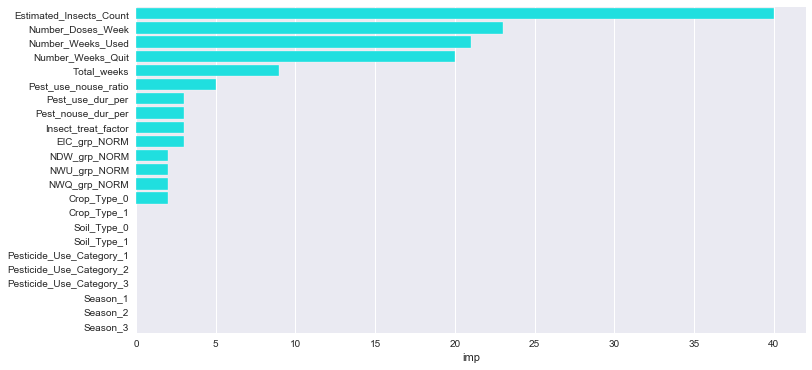

In [108]:
feature_imp=pd.DataFrame(model.feature_importances_,X_train.columns, columns=['imp'])
plt.figure(figsize=(12,6))
sns.barplot(x="imp",y=feature_imp.index,data=feature_imp.sort_values('imp',ascending=False), color='cyan')
plt.show()

In [109]:
pred=model.predict(X_tst)
sub['Crop_Damage'] = pred
sub.to_csv('submission.csv', index=False)

In [110]:
import lightgbm as lgb
lgbm_params =  {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': 3,
    'is_enable_sparse': True,
    'tree_learner':'voting',
    'metric': 'multi_error',
    #'learning_rate': 0.01,
    'num_leaves': 40,
    'max_depth': 20,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'reg_alpha': 0.01,
    'reg_lambda': 0.01,
    #'min_split_gain': 0.3,
    'min_child_weight': 0
                }

# LGBM Dataset
lgtrain = lgb.Dataset(X_trn,label=y_trn)
#lgtest = lgb.Dataset(X_tst,categorical_feature=categorical_feature)

In [130]:
N_FOLDS = 5
MAX_BOOST_ROUNDS = 1000
LEARNING_RATE = .1


cv_results = lgb.cv(lgbm_params, lgtrain, num_boost_round=MAX_BOOST_ROUNDS, nfold=N_FOLDS, stratified=True,
                    verbose_eval=10, early_stopping_rounds=60,eval_train_metric=True,show_stdv=True)


[10]	cv_agg's train multi_error: 0.159625 + 0.000106378	cv_agg's valid multi_error: 0.159625 + 0.000425499
[20]	cv_agg's train multi_error: 0.156505 + 0.000440372	cv_agg's valid multi_error: 0.15706 + 0.000708025
[30]	cv_agg's train multi_error: 0.15329 + 0.00051176	cv_agg's valid multi_error: 0.154978 + 0.00100752
[40]	cv_agg's train multi_error: 0.151475 + 0.000580404	cv_agg's valid multi_error: 0.15392 + 0.0013656
[50]	cv_agg's train multi_error: 0.150721 + 0.000576884	cv_agg's valid multi_error: 0.153661 + 0.00142723
[60]	cv_agg's train multi_error: 0.150032 + 0.000432621	cv_agg's valid multi_error: 0.153976 + 0.00119667
[70]	cv_agg's train multi_error: 0.149328 + 0.000360261	cv_agg's valid multi_error: 0.153807 + 0.000981393
[80]	cv_agg's train multi_error: 0.148827 + 0.000559812	cv_agg's valid multi_error: 0.153965 + 0.00100577
[90]	cv_agg's train multi_error: 0.148397 + 0.000484149	cv_agg's valid multi_error: 0.153818 + 0.00125478
[100]	cv_agg's train multi_error: 0.147899 + 0.0

In [131]:
# Display results
print('Current parameters:\n', lgbm_params)
print('\nBest num_boost_round:', len(cv_results['train multi_error-mean']))
print('Best CV score:', cv_results['train multi_error-mean'][-1])

Current parameters:
 {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'is_enable_sparse': True, 'tree_learner': 'voting', 'metric': 'multi_error', 'num_leaves': 40, 'max_depth': 16, 'feature_fraction': 0.5, 'bagging_fraction': 0.5, 'reg_alpha': 0.01, 'reg_lambda': 0.01, 'min_child_weight': 0}

Best num_boost_round: 46
Best CV score: 0.15106124429598938


In [132]:
model_lgb = lgb.train(lgbm_params, lgtrain, num_boost_round=100)

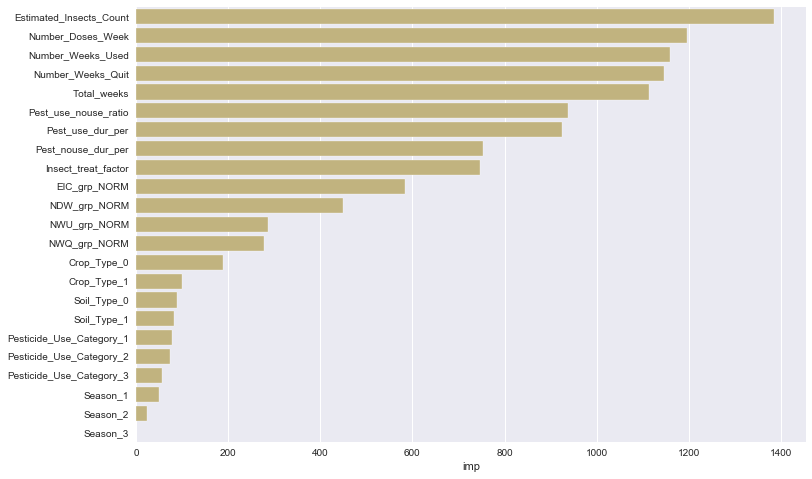

In [133]:
feature_imp=pd.DataFrame(model_lgb.feature_importance(),X_train.columns, columns=['imp'])
plt.figure(figsize=(12,8))
sns.barplot(x="imp",y=feature_imp.index,data=feature_imp.sort_values('imp',ascending=False), color=color[4])
plt.show()

In [134]:
from sklearn.metrics import accuracy_score
print('Accuracy on traing :',accuracy_score(y_train,np.argmax(model_lgb.predict(X_train), axis=1)))
print('Accuracy on Validation :',accuracy_score(y_valid,np.argmax(model_lgb.predict(X_valid), axis=1)))

Accuracy on traing : 0.8510536533213291
Accuracy on Validation : 0.8512829169480081


In [135]:
pred=np.argmax(model_lgb.predict(X_tst), axis=1)
sub['Crop_Damage'] = pred
sub.to_csv('submission.csv', index=False)

In [176]:
from catboost import CatBoostClassifier
categorical_feature = ['Crop_Type','Soil_Type','Pesticide_Use_Category','Season']
clf = CatBoostClassifier(
    random_seed=41,colsample_bylevel=.2,bagging_temperature=.2,
    class_names=[0,1,2],
    classes_count=3,
    class_weights={0:2.5,1:.415,2:.078},
    #class_weights= {0:1,1:.6,2:.9},
    use_best_model=True,
    iterations=400, 
    learning_rate=0.1,
    eval_metric='AUC',
    custom_loss=['Accuracy'],
    loss_function='MultiClass')


clf.fit(X_train, y_train, 
        #cat_features=categorical_feature, 
        eval_set=(X_valid, y_valid),
        plot=True
)
##Logloss, CrossEntropy, MultiClass, MultiClassOneVsAll 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6164493	best: 0.6164493 (0)	total: 58.9ms	remaining: 23.5s
1:	test: 0.6481082	best: 0.6481082 (1)	total: 115ms	remaining: 22.9s
2:	test: 0.6589012	best: 0.6589012 (2)	total: 172ms	remaining: 22.8s
3:	test: 0.6622410	best: 0.6622410 (3)	total: 234ms	remaining: 23.2s
4:	test: 0.6614040	best: 0.6622410 (3)	total: 294ms	remaining: 23.2s
5:	test: 0.6658236	best: 0.6658236 (5)	total: 340ms	remaining: 22.4s
6:	test: 0.6640852	best: 0.6658236 (5)	total: 384ms	remaining: 21.6s
7:	test: 0.6694730	best: 0.6694730 (7)	total: 440ms	remaining: 21.6s
8:	test: 0.6695738	best: 0.6695738 (8)	total: 487ms	remaining: 21.2s
9:	test: 0.6738050	best: 0.6738050 (9)	total: 544ms	remaining: 21.2s
10:	test: 0.6718496	best: 0.6738050 (9)	total: 591ms	remaining: 20.9s
11:	test: 0.6711006	best: 0.6738050 (9)	total: 645ms	remaining: 20.9s
12:	test: 0.6690523	best: 0.6738050 (9)	total: 700ms	remaining: 20.8s
13:	test: 0.6697454	best: 0.6738050 (9)	total: 758ms	remaining: 20.9s
14:	test: 0.6716472	best: 0.6

119:	test: 0.7674970	best: 0.7674970 (119)	total: 5.15s	remaining: 12s
120:	test: 0.7679113	best: 0.7679113 (120)	total: 5.19s	remaining: 12s
121:	test: 0.7680444	best: 0.7680444 (121)	total: 5.23s	remaining: 11.9s
122:	test: 0.7685259	best: 0.7685259 (122)	total: 5.27s	remaining: 11.9s
123:	test: 0.7685240	best: 0.7685259 (122)	total: 5.33s	remaining: 11.9s
124:	test: 0.7686241	best: 0.7686241 (124)	total: 5.41s	remaining: 11.9s
125:	test: 0.7688126	best: 0.7688126 (125)	total: 5.44s	remaining: 11.8s
126:	test: 0.7689594	best: 0.7689594 (126)	total: 5.48s	remaining: 11.8s
127:	test: 0.7690021	best: 0.7690021 (127)	total: 5.52s	remaining: 11.7s
128:	test: 0.7690126	best: 0.7690126 (128)	total: 5.56s	remaining: 11.7s
129:	test: 0.7693836	best: 0.7693836 (129)	total: 5.61s	remaining: 11.7s
130:	test: 0.7693756	best: 0.7693836 (129)	total: 5.66s	remaining: 11.6s
131:	test: 0.7695190	best: 0.7695190 (131)	total: 5.7s	remaining: 11.6s
132:	test: 0.7695776	best: 0.7695776 (132)	total: 5.73s	

234:	test: 0.7773823	best: 0.7773872 (233)	total: 10s	remaining: 7.02s
235:	test: 0.7774134	best: 0.7774134 (235)	total: 10s	remaining: 6.98s
236:	test: 0.7773939	best: 0.7774134 (235)	total: 10.1s	remaining: 6.94s
237:	test: 0.7773572	best: 0.7774134 (235)	total: 10.1s	remaining: 6.9s
238:	test: 0.7773692	best: 0.7774134 (235)	total: 10.2s	remaining: 6.86s
239:	test: 0.7773539	best: 0.7774134 (235)	total: 10.2s	remaining: 6.81s
240:	test: 0.7774716	best: 0.7774716 (240)	total: 10.2s	remaining: 6.76s
241:	test: 0.7774617	best: 0.7774716 (240)	total: 10.3s	remaining: 6.71s
242:	test: 0.7774448	best: 0.7774716 (240)	total: 10.3s	remaining: 6.66s
243:	test: 0.7774300	best: 0.7774716 (240)	total: 10.3s	remaining: 6.62s
244:	test: 0.7774550	best: 0.7774716 (240)	total: 10.4s	remaining: 6.59s
245:	test: 0.7774892	best: 0.7774892 (245)	total: 10.5s	remaining: 6.56s
246:	test: 0.7774915	best: 0.7774915 (246)	total: 10.5s	remaining: 6.52s
247:	test: 0.7775289	best: 0.7775289 (247)	total: 10.6s	

348:	test: 0.7792291	best: 0.7792844 (345)	total: 14.5s	remaining: 2.12s
349:	test: 0.7791976	best: 0.7792844 (345)	total: 14.6s	remaining: 2.08s
350:	test: 0.7791769	best: 0.7792844 (345)	total: 14.6s	remaining: 2.04s
351:	test: 0.7791439	best: 0.7792844 (345)	total: 14.6s	remaining: 2s
352:	test: 0.7791393	best: 0.7792844 (345)	total: 14.7s	remaining: 1.95s
353:	test: 0.7790879	best: 0.7792844 (345)	total: 14.7s	remaining: 1.91s
354:	test: 0.7791315	best: 0.7792844 (345)	total: 14.7s	remaining: 1.87s
355:	test: 0.7791243	best: 0.7792844 (345)	total: 14.8s	remaining: 1.82s
356:	test: 0.7791369	best: 0.7792844 (345)	total: 14.8s	remaining: 1.78s
357:	test: 0.7791582	best: 0.7792844 (345)	total: 14.8s	remaining: 1.74s
358:	test: 0.7791156	best: 0.7792844 (345)	total: 14.9s	remaining: 1.7s
359:	test: 0.7790579	best: 0.7792844 (345)	total: 14.9s	remaining: 1.65s
360:	test: 0.7790422	best: 0.7792844 (345)	total: 14.9s	remaining: 1.61s
361:	test: 0.7790422	best: 0.7792844 (345)	total: 14.9s

In [179]:
from sklearn.metrics import accuracy_score
print('Accuracy on traing :',accuracy_score(y_train,clf.predict(X_train)))
print('Accuracy on Validation :',accuracy_score(y_valid,clf.predict(X_valid)))

Accuracy on traing : 0.8380834482176519
Accuracy on Validation : 0.8371595768624803


In [180]:
pred=clf.predict(X_tst)
sub['Crop_Damage'] = pred
sub.to_csv('submission.csv', index=False)

In [178]:
clf.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'AUC',
 'iterations': 400,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 0.20000000298023224,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'use_best_model': True,
 'class_names': [0, 1, 2],
 'random_seed': 41,
 'depth': 6,
 'border_count': 254,
 'class_weights': [2.5, 0.4149999916553498, 0.07800000160932541],
 'bagging_temperature': 0.20000000298023224,
 'classes_count': 3,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'custom_metric': ['Accuracy'],
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'MultiClass',
 'learning_rate': 0.1000000014